In [62]:
# Homework 2
# Samuel Sunarjo 

In [5]:
# Problem 1.1

import numpy as np
input = np.array([-1, -5, -3])
print "L1 norm: " + str(np.linalg.norm(input, ord = 1))
print "L2 norm: " + str(np.linalg.norm(input, ord = 2))

L1 norm: 9.0
L2 norm: 5.9160797831


In [8]:
# Problem 1.2

import numpy as np
input = np.array([0, 4, 16])
print "L1 norm: " + str(np.linalg.norm(input, ord = 1))
print "L2 norm: " + str(np.linalg.norm(input, ord = 2))

L1 norm: 20.0
L2 norm: 16.4924225025


In [11]:
# Problem 2.1

input1 = np.array([4, -5, 3])
input2 = np.array([8, 10, 6])

print "Cosine value = " + str(np.dot(input1,input2)/((np.linalg.norm(input1, ord = 2))*np.linalg.norm(input2, ord = 2)))

Cosine value = 0.0


In [76]:
# Problem 2.2

input1 = np.array([1, -1, 1])
input2 = np.array([-1, 1, 1])

print "Cosine value = " + str(np.dot(input1,input2)/((np.linalg.norm(input1, ord = 2))*np.linalg.norm(input2, ord = 2)))

Cosine value = -0.333333333333


In [14]:
# Problem 3.a) non-convex
# Problem 3.b) non-convex
# Problem 3.c) convex
# Problem 3.d) convex

In [27]:
# Problem 4.1

import numpy as np
W = np.array([1.2,2,0.5,0.7])
b = -20

X = np.array([[8, 8, 16, 4],
              [4, 1, 1, 16],
              [6, 4, 4, 2],
              [4, 2, 4, 1],
              [8, 4, 8, 2]])

Y = np.array([1, -1, 1, -1, 1])

In [40]:
# Problem 4.2
y = np.dot(X,W) + b
y_c = np.array([1 if a >= 0 else -1 for a in y])

print "Predicted Label: y = " + str(y_c)
        

Predicted Label: y = [ 1 -1 -1 -1  1]


In [49]:
# Problem 4.3
print "accurancy = (#true_positives + #true_negatives)/#total_predictions = 4/5 = " + str(4.0/5)
print "recall = #true_positives/(#true_positives + #false_negatives) = 2/3 = " + str(2.0/3)
print "precision = #true_positives/(#true_positives + #false_positives) = 2/(2+0) = 1"
print "f-value = 2*precision*recall/(precision+recall) = (4/3)/(5/3) = 4/5 = " + str(4.0/5)

accurancy = (#true_positives + #true_negatives)/#total_predictions = 4/5 = 0.8
recall = #true_positives/(#true_positives + #false_negatives) = 2/3 = 0.666666666667
precision = #true_positives/(#true_positives + #false_positives) = 2/(2+0) = 1
f-value = 2*precision*recall/(precision+recall) = (4/3)/(5/3) = 4/5 = 0.8


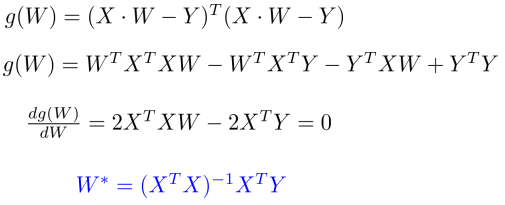

In [72]:
# Problem 5.1
# Derivation of 2nd order least square solution from L2-loss

from IPython.display import Image
Image("HW2_P5_1.png")

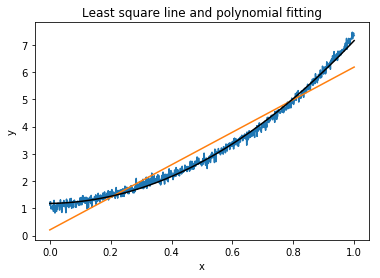

In [57]:
# Problem 5.2

import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('data.txt',dtype='float')
x = data[:,0].reshape(len(data),1)
y = data[:,1].reshape(len(data),1)

#line
X = np.hstack((np.ones((len(x),1)),np.power(x,1)))
X_t = X.transpose((1,0))
sol_l = np.dot(np.linalg.inv(np.dot(X_t,X)),np.dot(X_t,y))

# polynomial
X = np.hstack((np.ones((len(x),1)),np.power(x,1),np.power(x,2)))
X_t = X.transpose((1,0))
sol_p = np.dot(np.linalg.inv(np.dot(X_t,X)),np.dot(X_t,y))

plt.plot(x,y)
plt.plot(x,sol_l[0] + sol_l[1]*x)
plt.plot(x,sol_p[0] + sol_p[1]*x + sol_p[2]*(x**2),'k')
plt.title('Least square line and polynomial fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [62]:
# Problem 5.3
y_l = [sol_l[0]+sol_l[1]*a for a in x]
y_p = [sol_p[0]+sol_p[1]*a + sol_p[2]*(a**2) for a in x]

print "L2 distance of line model = %f" % np.linalg.norm(y-y_l, ord=2)
print "L2 distance of polynomial model= %f" % np.linalg.norm(y-y_p, ord=2)
print "L2 distance of polynomial model is smaller, which means this model is closer to the actual data. Thus polynomial model is a better model with respect to fitting this dataset."

L2 distance of line model = 14.353113
L2 distance of polynomial model= 3.969951
L2 distance of polynomial model is smaller, which means this model is closer to the actual data. Thus polynomial model is a better model with respect to fitting this dataset.


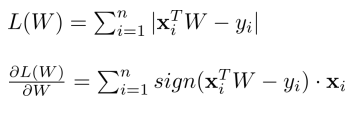

In [54]:
# Problem 6.1
# Derivation of gradient of L1-loss w.r.t. W

from IPython.display import Image
Image("HW2_P6_1.png")

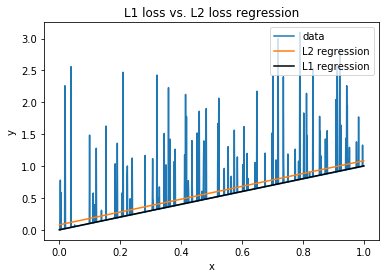

In [77]:
# Problem 6.2

import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('data_2.txt',dtype='float')
x = data[:,0].reshape(len(data),1)
y = data[:,1].reshape(len(data),1)
X = np.hstack((np.ones((len(x),1)),np.power(x,1)))
Y = np.array(y)

# Gradient descent with L1 loss
alpha = 0.00001
W = np.array([[0],[0]]) # initial guess
for i in range(2000):
    W = W - alpha*np.dot(np.sign((np.dot(X,W)-Y)).transpose((1,0)),X).transpose((1,0))
    #print W

# L2 line
X = np.hstack((np.ones((len(x),1)),np.power(x,1)))
X_t = X.transpose((1,0))
sol_l = np.dot(np.linalg.inv(np.dot(X_t,X)),np.dot(X_t,y))

plt.plot(x,y,label = 'data')
plt.plot(x,sol_l[0] + sol_l[1]*x, label = 'L2 regression')
plt.plot(x,W[0] + W[1]*x,'k', label = 'L1 regression')
plt.title('L1 loss vs. L2 loss regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()